In [74]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.use("Qt4Agg")
#mpl.use('Qt4Agg')
mpl.interactive(False)
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
#from mayavi import mlab
#import matplotlib.mlab as mlab
import matplotlib.animation as animation
#mlab.init_notebook('png', 400, 300)
#database & file io
import numpy as np
import pandas as pd
import xarray as xr
from io import StringIO
#import animatplot as amp

In [3]:
#import flow data 
dynancfile='/Users/sisichen/Google Drive/data/IUGG/DNS_model/ccnN100/noseed/out1.ncf'
fh = Dataset(dynancfile,mode='r')
#ZX=fh.variables['ZX'][:]
#ZY=fh.variables['ZY'][:]
#ZZ=fh.variables['ZZ'][:]
QV=fh.variables['QV'][:]
TH=fh.variables['TH'][:]
#U=fh.variables['U'][:]
fh.close()

In [201]:
#load flow field and assign coordinates
ds = xr.open_dataset('/Users/sisichen/Google Drive/data/IUGG/DNS_model/ccnN100/noseed/flow_r10n10.ncf')
ds_coords=ds.assign_coords(T=ds.TIMES,X=np.linspace(0,0.165,128),Y=np.linspace(0,0.165,128),Z=np.linspace(0,0.165,128))
#import droplet data
#df = pd.read_csv('droplet_new.track',sep='\s+',header=None,names=['time','id','x','y','z','r','s'])

In [143]:
ds_coords

<xarray.Dataset>
Dimensions:  (T: 5, X: 128, Y: 128, Z: 128)
Coordinates:
  * T        (T) float32 83.667725 91.53124 99.39477 107.258286 115.1218
  * X        (X) float64 0.0 0.001299 0.002598 0.003898 ... 0.1624 0.1637 0.165
  * Y        (Y) float64 0.0 0.001299 0.002598 0.003898 ... 0.1624 0.1637 0.165
  * Z        (Z) float64 0.0 0.001299 0.002598 0.003898 ... 0.1624 0.1637 0.165
Data variables:
    TIMES    (T) float32 ...
    U        (T, Y, Z, X) float32 ...
    V        (T, Y, Z, X) float32 ...
    W        (T, Y, Z, X) float32 ...
    ZX       (T, Y, Z, X) float32 ...
    ZY       (T, Y, Z, X) float32 ...
    ZZ       (T, Y, Z, X) float32 ...
    TH       (T, Y, Z, X) float32 ...
    QV       (T, Y, Z, X) float32 ...

In [202]:
x_location=0.08
ds_coords.sel(X=x_location,method='nearest') #slides of X near 0.05m

<xarray.Dataset>
Dimensions:  (T: 5, Y: 128, Z: 128)
Coordinates:
  * T        (T) float32 211.84305 211.92168 212.00032 212.07895 212.1576
    X        float64 0.08055
  * Y        (Y) float64 0.0 0.001299 0.002598 0.003898 ... 0.1624 0.1637 0.165
  * Z        (Z) float64 0.0 0.001299 0.002598 0.003898 ... 0.1624 0.1637 0.165
Data variables:
    TIMES    (T) float32 ...
    U        (T, Y, Z) float32 ...
    V        (T, Y, Z) float32 ...
    W        (T, Y, Z) float32 ...
    ZX       (T, Y, Z) float32 ...
    ZY       (T, Y, Z) float32 ...
    ZZ       (T, Y, Z) float32 ...
    TH       (T, Y, Z) float32 ...
    QV       (T, Y, Z) float32 ...

/Users/sisichen/anaconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'shading'
  # This is added back by InteractiveShellApp.init_path()
/Users/sisichen/anaconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'shading'
  if sys.path[0] == '':


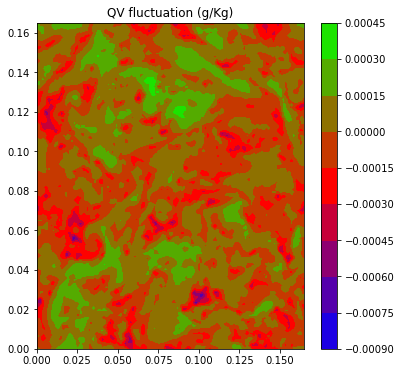

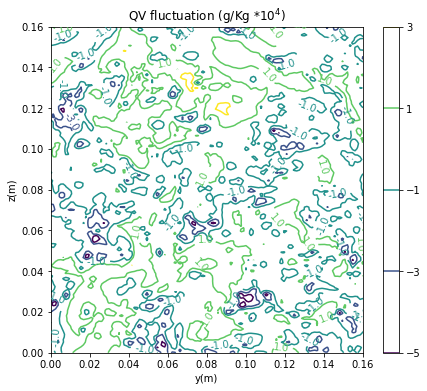

In [208]:
%matplotlib inline
ds_slices=ds_coords.sel(T=ds_coords.TIMES[4],X=ds_coords.X[31]) #select one slice at one timeframe
#vort_slices=ds_slices.ZX**2+ds_slices.ZY**2+ds_slices.ZZ
field_slice=ds_slices.QV
#plot the fields slice
dx, dy = 16.5e-2/127, 16.5e-2/127
y,z = np.mgrid[slice(0,16.5e-2+dx,dx),slice(0,16.5e-2+dy,dy)]
levels = np.arange(-5,4,2)
#2D colormesh
fig, ax = plt.subplots(figsize=(6, 6))
cs1=ax.contourf(z,y,field_slice*1e3, cmap='brg',shading='flat')
cs1=ax.contourf(z,y,field_slice*1e3, cmap='brg',shading='flat')
fig.colorbar(cs1)
plt.title('QV fluctuation (g/Kg)')
#2D contour
fig, ax = plt.subplots(figsize=(7, 6))
cs2=ax.contour(ds_slices.Y, ds_slices.Z, field_slice*1e7,levels=levels)
plt.clabel(cs2, inline=1,fmt='%r',fontsize=10)
plt.xlabel('y(m)')
plt.ylabel('z(m)')
plt.ylim([0 ,0.16])
plt.xlim([0 ,0.16])
plt.title('QV fluctuation (g/Kg $* 10^4$)')
plt.colorbar(cs2)
fig.savefig('/Users/sisichen/qv_r10n10.png')

In [161]:
ds_slices

<xarray.Dataset>
Dimensions:  (Y: 128, Z: 128)
Coordinates:
    T        float32 146.57585
    X        float64 0.04028
  * Y        (Y) float64 0.0 0.001299 0.002598 0.003898 ... 0.1624 0.1637 0.165
  * Z        (Z) float64 0.0 0.001299 0.002598 0.003898 ... 0.1624 0.1637 0.165
Data variables:
    TIMES    float32 ...
    U        (Y, Z) float32 ...
    V        (Y, Z) float32 ...
    W        (Y, Z) float32 ...
    ZX       (Y, Z) float32 ...
    ZY       (Y, Z) float32 ...
    ZZ       (Y, Z) float32 ...
    TH       (Y, Z) float32 ...
    QV       (Y, Z) float32 -5.232521e-10 6.062478e-11 ... -8.4009416e-10

In [142]:
#set up 3D grid points
x1=np.linspace(0,8.3,64)
y1=np.linspace(0,8.3,64)
z1=np.linspace(0,8.3,64)
yv,zv,xv = np.meshgrid(y1,z1,x1,indexing='ij')

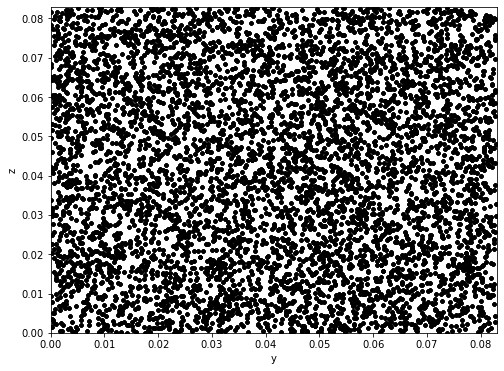

In [26]:
fig,ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('y')
ax1.set_ylabel('z')
ax1.set_xlim(0,0.083)
ax1.set_ylim(0,0.083)
dx, dy = 8.3e-2/63, 8.3e-2/63
y,z = np.mgrid[slice(0,8.3e-2+dx,dx),slice(0,8.3e-2+dy,dy)]

ds_slice=ds_coords.sel(X=ds_coords.X[31])#select one slice
vort_slice=ds_slice.ZX**2+ds_slice.ZY**2+ds_slice.ZZ**2
field_slice=vort_slice
images=[]
times=ds_coords.TIMES
for i in range(1,15):
    field_slice_tp=field_slice.sel(T=times[i])
    ydrop=df[df['time']==df.time[i]].y
    zdrop=df[df['time']==df.time[i]].z
    #image1,  = ax1.pcolormesh(y,z,field_slice_tp, cmap='rainbow',shading='gouraud',vmin=0, vmax=30000)
    image2,  = ax1.plot(ydrop,zdrop,'.',color='black', alpha=0.5)
    #fig.colorbar(image1,ax=ax)
    images.append([image2])


In [295]:

import animatplot as amp

In [280]:

ds_slice=ds_coords.sel(X=ds_coords.X[31])#select one slice
vort_slice=ds_slice.ZX**2+ds_slice.ZY**2+ds_slice.ZZ**2
field_slice=vort_slice
ds_coords.TIMES[0]
times=ds_coords.TIMES
field_slice_tp=field_slice.sel(T=times[0])
field_slice_tp

<xarray.DataArray (Y: 64, Z: 64)>
array([[ 7882.176  , 11307.041  ,  7872.3394 , ...,   379.4458 ,   217.79495,
         3604.101  ],
       [ 7227.4414 , 11911.521  ,  9704.545  , ...,  1037.0466 ,   396.1455 ,
         2352.9207 ],
       [ 7742.872  , 11552.936  ,  9695.293  , ...,  4803.6357 ,  4418.9897 ,
         4256.306  ],
       ...,
       [ 5307.1665 ,  3088.0083 ,  1761.9363 , ...,  3450.592  ,   358.9452 ,
         5065.272  ],
       [ 6236.4624 ,  5810.915  ,  2893.4375 , ...,  3612.1492 ,   358.4559 ,
         4494.154  ],
       [ 7432.2056 ,  8093.865  ,  4489.1484 , ...,   670.7163 ,   410.2006 ,
         4954.3916 ]], dtype=float32)
Coordinates:
    T        float32 0.31450933
    X        float64 0.04084
  * Y        (Y) float64 0.0 0.001317 0.002635 ... 0.08037 0.08168 0.083
  * Z        (Z) float64 0.0 0.001317 0.002635 ... 0.08037 0.08168 0.083

ValueError: too many values to unpack (expected 2)

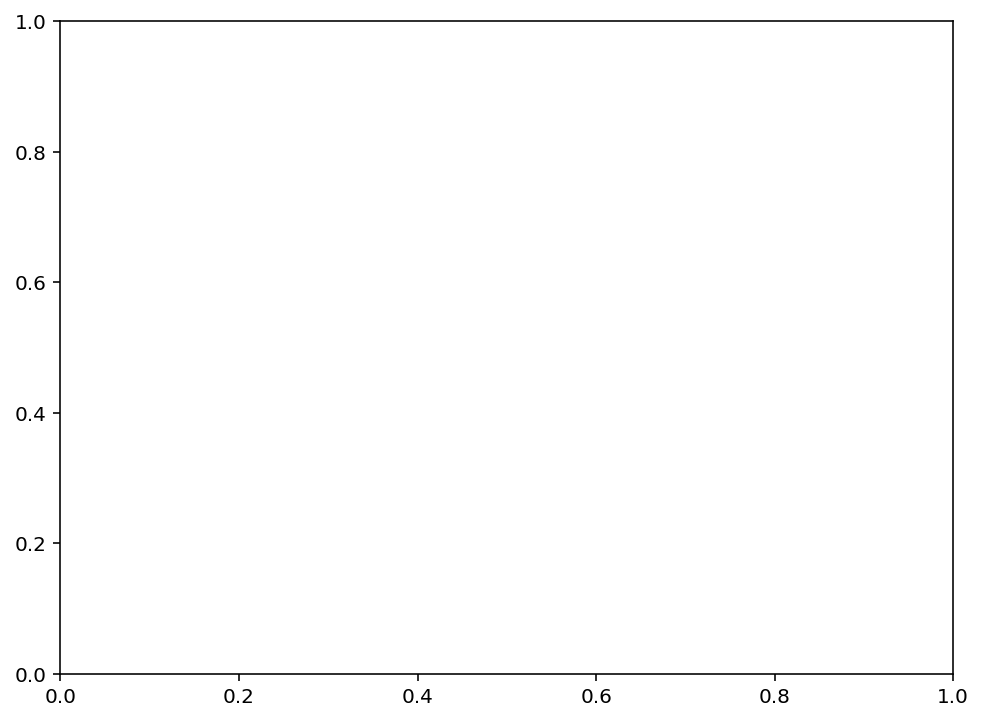

In [250]:
#get the slice info and plot
ds_slices=ds_coords.sel(T=ds_coords.TIMES[0],X=ds_coords.X[31]) #select one slice at one timeframe
vort_slices=ds_slices.ZX**2+ds_slices.ZY**2+ds_slices.ZZ
droplets_slice=df[df['time']==df.time[0]].copy()
droplets_slice=droplets_slice[abs(droplets_slice['x']-x_location)<0.04].copy()
fig,ax = plt.subplots(figsize=(8, 6))
im1=ax.pcolormesh(y,z,field_slice, cmap='rainbow',shading='gouraud',vmin=0, vmax=30000)
fig.colorbar(im1,ax=ax)
im2=ax.scatter(droplets_slice.y, droplets_slice.z, s=1, color='black', alpha=0.5)
plt.ylim(bottom=0,top=0.083)
plt.xlim(left=0,right=0.083)

/bin/sh: sshpass: command not found
